## Detecção de faces em imagens
***

O objetivo é ao detectar uma face desenhar um retangulo sobre ela

***

In [1]:
import cv2 as cv
from matplotlib import pyplot as plt

In [2]:
# Cria um classificador passando o xml haarcascade treinado
classificador = cv.CascadeClassifier("./cascades/haarcascade_frontalface_default.xml")

In [3]:
# Armazena a imagem e coloca ela em tons de cinza
img = cv.imread("./imagens/beatles.jpg")
imagem_colorida = cv.cvtColor(img, cv.COLOR_BGR2RGB)
imagem_cinza = cv.cvtColor(imagem_colorida, cv.COLOR_RGB2GRAY)

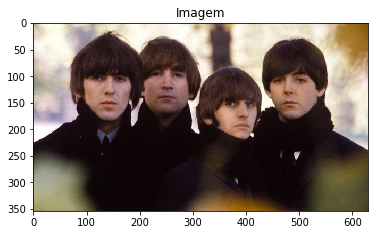

In [4]:
# Mostrar a imagem
plt.imshow(imagem_colorida)
plt.title("Imagem")
plt.show()

In [5]:
# Armazena todas as faces detectadas (matriz) pela imagem passada
faces_detectadas = classificador.detectMultiScale(imagem_cinza)
print("Foi identificado " + str(len(faces_detectadas)) + " faces.")
print(faces_detectadas) # [x, y, largura, altura] da face (retangulo)

Foi identificado 4 faces.
[[194  53 113 113]
 [ 91  69 104 104]
 [431  68 105 105]
 [348 124  87  87]]


In [6]:
retangulo_cor = (0, 0, 255) # rgb
tamanho_borda = 2
for (x, y, largura, altura) in faces_detectadas:
    cv.rectangle(imagem_colorida, (x, y), (x + largura, y + altura), retangulo_cor, tamanho_borda)

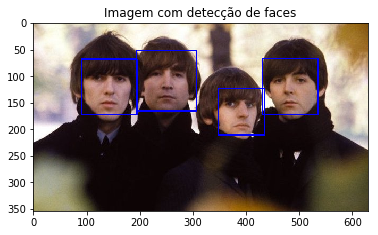

In [7]:
# Mostrar a imagem
plt.imshow(imagem_colorida)
plt.title("Imagem com detecção de faces")
plt.show()

***
### Exemplo 02
***

Modificando parâmetros da imagem para corrigir falhas.

* **ScaleFactor**: Quando objetos estão perto da câmera, elas serão maiores que objetos ao fundo da câmera, ele especifica quanto o tamanho da imagem é reduzido em cada escala de imagem e redimensiona um objeto maior para um menor. Ele fica mais lento a medida que vai diminuindo o valor. Valor padrão é 1.1 e não pode valores abaixo de 1.01, abaixo de 1.1 ele vai tentar detectar mais objetos e acima detecta menos.


* **minNeighbors**: Número mínimo de retângulos que podem ser gerados ao lado do retangulo principal. Quanto maior o valor teremos menos detecções, porém uma maior qualidade. Já quando temos valores baixo, há mais detecções de objetos próximos porém a qualidade é menor podendo gerar detecções erradas, é usado quando a foto tem objetos muito próximos.


* **minSize**: Especifica o menor objeto a ser reconhecido, 30x30 é o valor padrão. Se tiver um objeto menor que 30x30 ele não irá reconhecer.

***

In [8]:
# Armazena a imagem e coloca ela em tons de cinza
img = cv.imread("./imagens/pessoas2.jpg")
imagem_colorida = cv.cvtColor(img, cv.COLOR_BGR2RGB)
imagem_cinza = cv.cvtColor(imagem_colorida, cv.COLOR_RGB2GRAY)

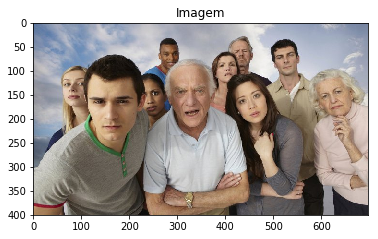

In [9]:
# Mostrar a imagem
plt.imshow(imagem_colorida)
plt.title("Imagem")
plt.show()

In [10]:
faces_detectadas = classificador.detectMultiScale(
    imagem_cinza,
    scaleFactor=1.09,
    minNeighbors=5,
    minSize=(30, 30)
)
print("Foi identificado " + str(len(faces_detectadas)) + " faces.")
print(faces_detectadas)

Foi identificado 11 faces.
[[416  45  36  36]
 [260  44  52  52]
 [377  67  55  55]
 [495  45  62  62]
 [217 124  60  60]
 [611 171  56  56]
 [ 48  98  73  73]
 [280 106  97  97]
 [413 126  79  79]
 [590 122  72  72]
 [100 117 126 126]]


In [11]:
retangulo_cor = (0, 0, 255) # rgb
tamanho_borda = 2
for (x, y, largura, altura) in faces_detectadas:
    cv.rectangle(imagem_colorida, (x, y), (x + largura, y + altura), retangulo_cor, tamanho_borda)

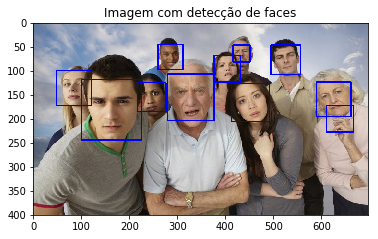

In [12]:
# Mostrar a imagem
plt.imshow(imagem_colorida)
plt.title("Imagem com detecção de faces")
plt.show()

***
### Exemplo 03
***

In [13]:
# Armazena a imagem e coloca ela em tons de cinza
img = cv.imread("./imagens/pessoas4.jpg")
imagem_colorida = cv.cvtColor(img, cv.COLOR_BGR2RGB)
imagem_cinza = cv.cvtColor(imagem_colorida, cv.COLOR_RGB2GRAY)

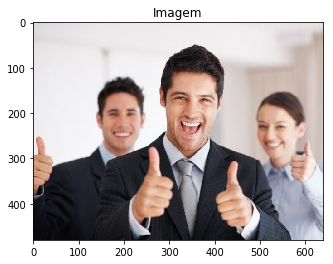

In [14]:
# Mostrar a imagem
plt.imshow(imagem_colorida)
plt.title("Imagem")
plt.show()

In [15]:
faces_detectadas = classificador.detectMultiScale(
    imagem_cinza,
    scaleFactor=1.09,
    minNeighbors=5,
    minSize=(70, 70)
)
print("Foi identificado " + str(len(faces_detectadas)) + " faces.")
print(faces_detectadas)

Foi identificado 3 faces.
[[484 190 105 105]
 [141 159 111 111]
 [277 113 150 150]]


In [16]:
retangulo_cor = (0, 0, 255) # rgb
tamanho_borda = 2
for (x, y, largura, altura) in faces_detectadas:
    cv.rectangle(imagem_colorida, (x, y), (x + largura, y + altura), retangulo_cor, tamanho_borda)

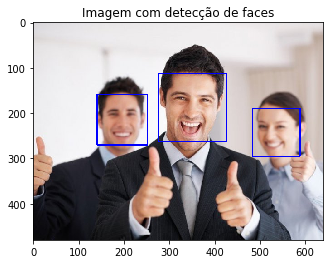

In [17]:
# Mostrar a imagem
plt.imshow(imagem_colorida)
plt.title("Imagem com detecção de faces")
plt.show()

***
### Detectar olhos
***

In [18]:
# Classificador dos olhos
classificador_olhos = cv.CascadeClassifier("./cascades/haarcascade_eye.xml")

In [19]:
# Armazena a imagem e coloca ela em tons de cinza
img = cv.imread("./imagens/faceolho.jpg")
imagem_colorida = cv.cvtColor(img, cv.COLOR_BGR2RGB)
imagem_cinza = cv.cvtColor(imagem_colorida, cv.COLOR_RGB2GRAY)

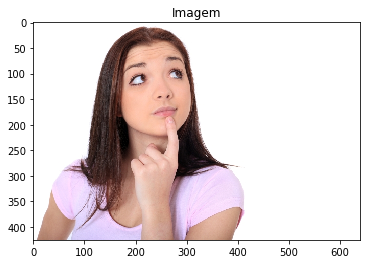

In [20]:
# Mostrar a imagem
plt.imshow(imagem_colorida)
plt.title("Imagem")
plt.show()

In [21]:
faces_detectadas = classificador.detectMultiScale(imagem_cinza)
print("Foi identificado " + str(len(faces_detectadas)) + " face.")
print(faces_detectadas)

Foi identificado 1 face.
[[156  41 177 177]]


In [22]:
retangulo_cor = (0, 0, 255) # rgb
tamanho_borda = 2

In [23]:
def detecta_olhos(x, y, largura, altura, img_faces):
    """
    Detecta os olhos de uma face.
    """
    
    # [y:y+altura] = Começa na posição y e vai até a posição y + altura
    face = img_faces[y:y+altura, x:x+largura]
    face_cinza = cv.cvtColor(face, cv.COLOR_RGB2GRAY)
    olhos_detectados = classificador_olhos.detectMultiScale(face_cinza)
    
    for (x, y, largura, altura) in olhos_detectados:
        cv.rectangle(face, (x, y), (x + largura, y + altura), retangulo_cor, tamanho_borda)

In [24]:
for (x, y, largura, altura) in faces_detectadas:
    img_faces = cv.rectangle(imagem_colorida, (x, y), (x + largura, y + altura), retangulo_cor, tamanho_borda)
    detecta_olhos(x, y, largura, altura, img_faces)

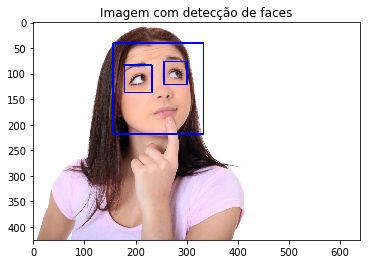

In [25]:
# Mostrar a imagem
plt.imshow(imagem_colorida)
plt.title("Imagem com detecção de faces")
plt.show()